In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from model import from_student_number_to_naca, add_zeros
from tqdm import tqdm as tqdm

from pathlib import Path

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Fixed geometry parametrization for both airfoils. 

In [3]:
NUM_POINTS_X = 100

In [4]:
ALPHA_0 = -15
ALPHA_N =  15
N = 5
ALPHAS = np.linspace(ALPHA_0, ALPHA_N, N)
ALPHAS = np.insert(ALPHAS, 0, 0)
ALPHAS = np.sort(ALPHAS)

### Create solver methods

In [5]:
ITERATIONS_MAX     = 1e4
ITERATIONS_RESTART = ITERATIONS_MAX
%run 2-Solver.ipynb

In [6]:
STUDENT_NUMBER = 

In [7]:
naca1, naca2 = from_student_number_to_naca(STUDENT_NUMBER)

13
False
True


In [8]:
print(f'1st NACA = {naca1}', f'2nd NACA = {naca2}', sep = '\n')

1st NACA = 0007
2nd NACA = 0014


## Solve for the first airfoil

### NACA-0007

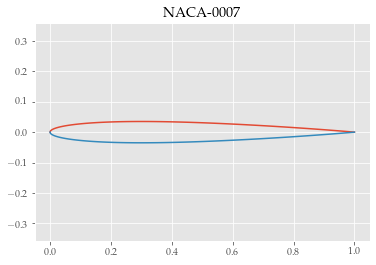

100%|██████████| 6/6 [00:34<00:00,  5.70s/it]


In [9]:
NACA = naca1
%run 1-Geometry.ipynb

x_naca1, y_naca1 = x_c, y_c

data_naca1_cp = []
data_naca1_cl = []

for alpha in tqdm(ALPHAS):
    
    _, cp, cl = solve(alpha)
    
    data_naca1_cp.append((alpha, cp))
    data_naca1_cl.append((alpha, cl))

### NACA-0014

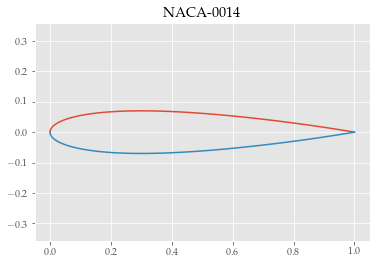

100%|██████████| 6/6 [00:33<00:00,  5.57s/it]


In [10]:
NACA = naca2
%run 1-Geometry.ipynb

x_naca2, y_naca2 = x_c, y_c

data_naca2_cp = []
data_naca2_cl = []

for alpha in tqdm(ALPHAS):
    
    _, cp, cl = solve(alpha)
    
    data_naca2_cp.append((alpha, cp))
    data_naca2_cl.append((alpha, cl))

## Lift comparison

In [11]:
cl_naca1_df = pd.DataFrame(data_naca1_cl, columns=['alpha', f'{naca1}-cl'])
cl_naca1_df = cl_naca1_df.set_index('alpha')

In [12]:
cl_naca2_df = pd.DataFrame(data_naca2_cl, columns=['alpha', f'{naca2}-cl'])
cl_naca2_df = cl_naca2_df.set_index('alpha')

In [55]:
cl_data_df = pd.DataFrame()

cl_data_df[f'{naca1}'] = cl_naca1_df[f'{naca1}-cl']

cl_data_df[f'{naca2}'] = cl_naca2_df[f'{naca2}-cl']

In [56]:
path_data = Path('../data/thickness_comparison')

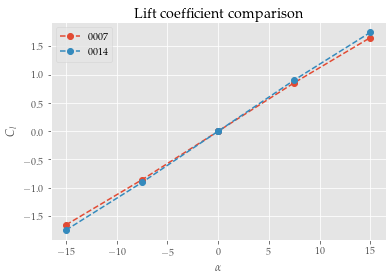

In [57]:
ax = cl_data_df.plot(linestyle = '--', marker = 'o')

ax.set(title  = f'Lift coefficient comparison', 
       xlabel = '$\\alpha$', 
       ylabel = '$C_l$')

plt.savefig(path_data / 'cl_comparison.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)

### Pressure distribution comparison

In [30]:
cp_naca1_df = pd.DataFrame(index = x_naca1)

for element in data_naca1_cp:
    
    alpha, cp = element
    
    cp_naca1_df[alpha] = pd.Series(cp, index = x_naca1)

In [37]:
cp_naca2_df = pd.DataFrame(index = x_naca2)

for element in data_naca2_cp:
    
    alpha, cp = element
    
    cp_naca2_df[alpha] = pd.Series(cp, index = x_naca2)

Text(0.5, 1.0, '15.0')

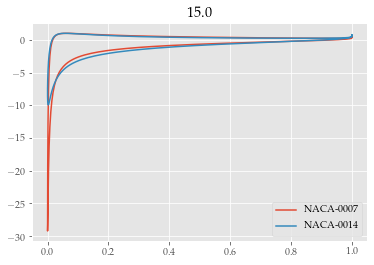

In [53]:
_alpha = ALPHAS[-1]
cp_naca1_df[_alpha].plot(label = f'NACA-{naca1}')
cp_naca2_df[_alpha].plot(label = f'NACA-{naca2}')
plt.legend()
plt.title(_alpha)